In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_curve, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import seaborn as sns


df = pd.read_csv('data/fraud_data.csv')
print('data shape', df.shape)
df.head(2)

data shape (21693, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.49918,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.16590,0.360251,0.195321,-0.256273,0.056501,912.00,0


In [2]:
X = df.drop(columns=['Class']) # Features (all except the 'Class' column)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Logistic Regression


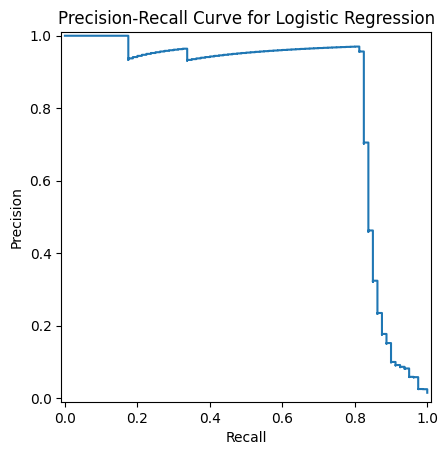

/Users/yutine/Documents/computer_science/Python/ML_Classification_Pipeline/.venv/lib/python3.9/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


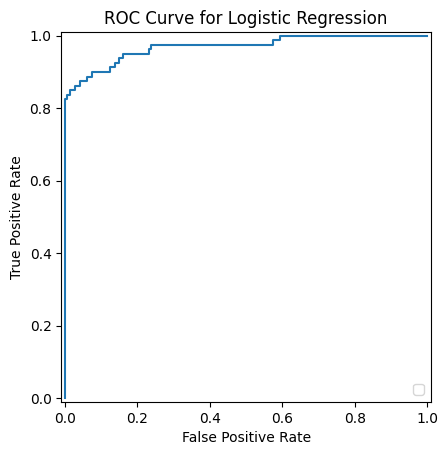

In [3]:
# Use ‘liblinear’ for handling binary classification and a smaller dataset
def precision_recall_roc_curve_from_logistic_regression():
    clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)

    # Compute the scores using predict_prob
    y_scores = clf.predict_proba(X_test)[:, 1]

    # Create a precision recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
    pr_display.plot()
    plt.title('Precision-Recall Curve for Logistic Regression')
    plt.show()

    # Create a ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
    roc_display.plot()
    plt.title('ROC Curve for Logistic Regression')
    plt.show()

    return fpr, tpr, precision, recall

# Make below metrics global variables for further analysis
fpr, tpr, precision, recall = precision_recall_roc_curve_from_logistic_regression()

In [4]:
def find_tpr_n_recall_from_fpr(target_fpr: float, num_of_closest_indices: int):
    # Get the indices where FPR is closest to the target
    close_indices = (abs(fpr - target_fpr)).argsort()[:num_of_closest_indices]

    # Get the corresponding TPRs
    tprs_at_target_fpr = tpr[close_indices]

    # Get the corresponding recall
    recall_at_target_fpr = recall[close_indices]

    # Optional: select the highest TPR and Recall
    highest_tpr = max(tprs_at_target_fpr)
    highest_recall = max(recall_at_target_fpr)

    print(f"Highest TPR at FPR closest to {target_fpr} is: {highest_tpr:.3f}")
    print(f"Highest Recall at FPR closest to {target_fpr} is: {highest_recall:.3f}")

    return None

find_tpr_n_recall_from_fpr(target_fpr=0.16, num_of_closest_indices=2)


Highest TPR at FPR closest to 0.16 is: 0.950
Highest Recall at FPR closest to 0.16 is: 1.000


Use **Grid Search** method to find the best combination of parameter

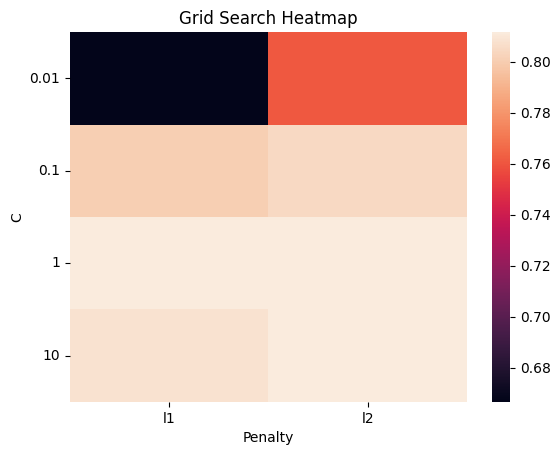

In [5]:
def grid_search_w_logistic_regression(parameter_grid: dict, scoring_metric: str):

    # Initiate the classifier
    clf = LogisticRegression(solver='liblinear')

    # Perform grid search with scoring metric
    grid_clf = GridSearchCV(clf, parameter_grid, scoring=scoring_metric, cv=3)
    grid_clf.fit(X_train, y_train)

    # Extract mean test scores from .cv_results_
    mean_test_scores = np.array(grid_clf.cv_results_['mean_test_score']).reshape(4,2)
    return mean_test_scores


def GridSearch_Heatmap(scores):
    plt.figure()
    sns.heatmap(scores, xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.title('Grid Search Heatmap')
    plt.xlabel("Penalty")
    plt.ylabel("C")
    plt.yticks(rotation=0)
    plt.show()

param_grid = {
        'penalty':['l1', 'l2'],
        'C':[0.01, 0.1, 1, 10]
    }

GridSearch_Heatmap(grid_search_w_logistic_regression(parameter_grid=param_grid, scoring_metric='recall'))